### Implementing the Convolutional Neural Network (CNN) architecture depicted in Figure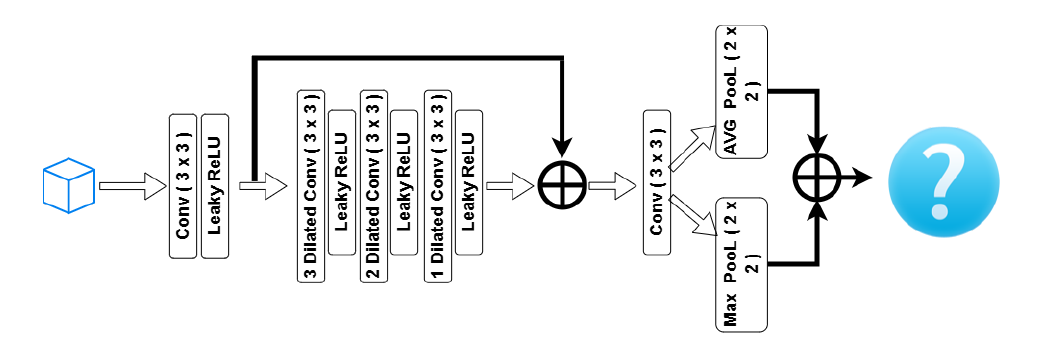 using TensorFlow/Keras

In [28]:
import tensorflow as tf
import numpy as np

In [29]:
tf.config.run_functions_eagerly(True)


In [44]:
# ----------------------------- #
#     Input (1 x 5 x 5 x 1)     #
# ----------------------------- #

X = np.array([
  [1,2,3,0,1],
  [0,1,2,3,0],
  [3,0,1,2,1],
  [1,2,3,0,0],
  [0,1,0,1,2]
], dtype=np.float32).reshape(1,5,5,1)

I = tf.keras.Input(shape=(5,5,1))

In [55]:
#------------------------#
#   Convolute Function   #
#------------------------#

def convolute(N, dil):
    a = tf.keras.layers.Conv2D(
        1, (3,3),
        dilation_rate=dil,
        padding="same",
        kernel_initializer="ones",
        use_bias=False
    )(N)
    a = tf.keras.layers.LeakyReLU()(a)
    return a

In [56]:
# Initial Conv
c1 = convolute(I, 1)

# Dilated Convs
d1 = convolute(c1, 3)
d2 = convolute(d1, 2)
d3 = convolute(d2, 1)

# Residual Add
res = tf.keras.layers.Add()([c1, d3])

# Intermediate Conv
mid = convolute(res, 1)

# Parallel Pooling
avg = tf.keras.layers.AveragePooling2D((2,2))(mid)
mx  = tf.keras.layers.MaxPooling2D((2,2))(mid)

# Final Output
out = tf.keras.layers.Add()([avg, mx])
model = tf.keras.Model(I, out)


In [47]:
model.summary()
print(model.predict(X))


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 5, 5, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 5, 5, 1)   │          9 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_12      │ (None, 5, 5, 1)   │          0 │ conv2d_17[0][0]   │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 5, 5, 1)   │          9 │ leaky_re_lu_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_13      │ (None, 5, 5, 1)   │          0 │ conv2d_18[0][0]   │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 5, 5, 1)   │          9 │ leaky_re_lu_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_14      │ (None, 5, 5, 1)   │          0 │ conv2d_19[0][0]   │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 5, 5, 1)   │          9 │ leaky_re_lu_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_15      │ (None, 5, 5, 1)   │          0 │ conv2d_20[0][0]   │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 5, 5, 1)   │          0 │ leaky_re_lu_12[0… │
│                     │                   │            │ leaky_re_lu_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 5, 5, 1)   │          9 │ add_6[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_16      │ (None, 5, 5, 1)   │          0 │ conv2d_21[0][0]   │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d_3 │ (None, 2, 2, 1)   │          0 │ leaky_re_lu_16[0… │
│ (AveragePooling2D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 2, 2, 1)   │          0 │ leaky_re_lu_16[0… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 2, 2, 1)   │          0 │ average_pooling2… │
│                     │                   │            │ max_pooling2d_3[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 45 (180.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[[[13836.5 ]
   [17082.75]]

  [[17054.25]
   [21165.  ]]]]


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [53]:
debug_model = tf.keras.Model(I, [c1, d1, d2, d3, res, mid, mx, avg, out])
vals = debug_model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [71]:
import matplotlib.pyplot as plt
import numpy as np

def show_matrix_and_heatmap(mat, title):
    fig = plt.figure(figsize=(8,4))

    # ---- Left: Matrix values ----
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.axis("off")
    table = ax1.table(
        cellText=np.round(mat, 1),
        loc="center"
    )
    table.scale(1.2, 1.2)
    ax1.set_title(f"{title}\n(Matrix Values)")

    # ---- Right: Heatmap ----
    ax2 = fig.add_subplot(1, 2, 2)
    im = ax2.imshow(mat)
    plt.colorbar(im, ax=ax2, fraction=0.046)
    ax2.set_title(f"{title}\n(Heatmap)")

    plt.tight_layout()
    plt.show()

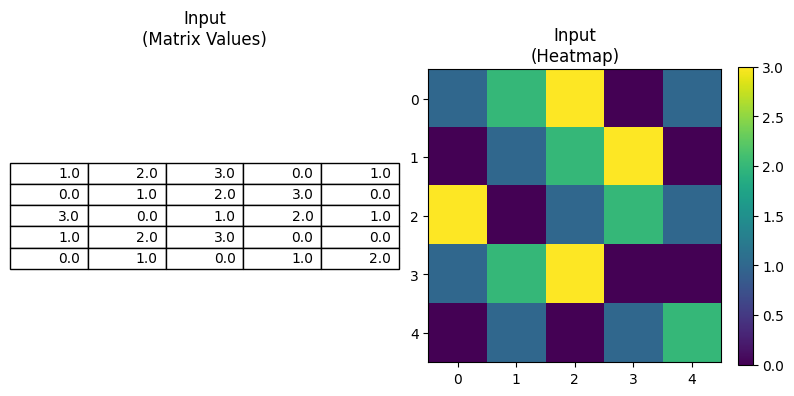

In [61]:
show_matrix_and_heatmap(X[0, :, :, 0], "Input")

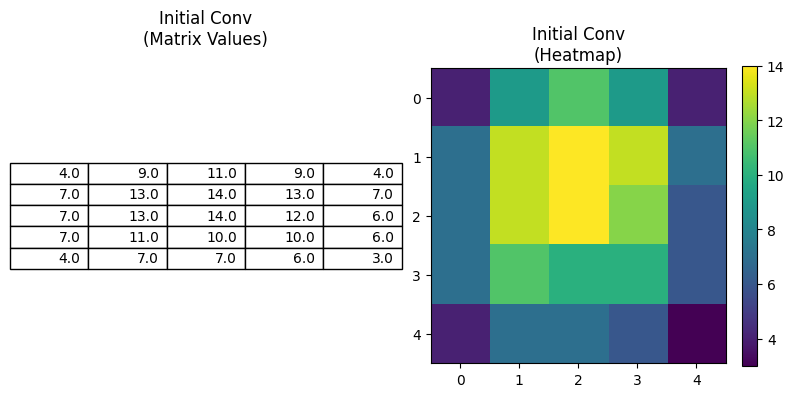

In [62]:
show_matrix_and_heatmap(vals[0][0, :, :, 0], "Initial Conv")

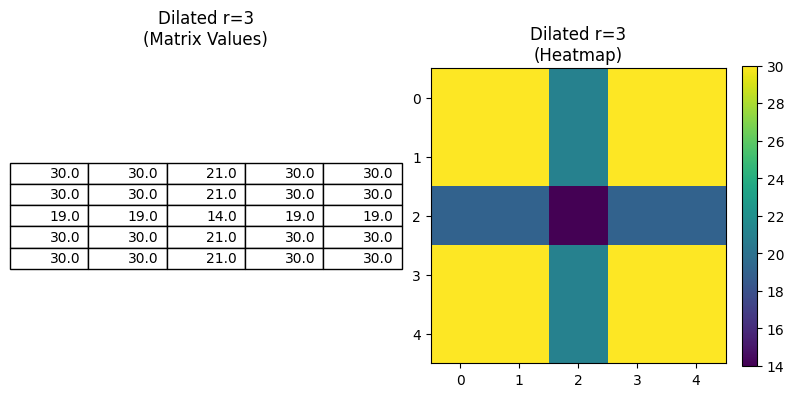

In [63]:
show_matrix_and_heatmap(vals[1][0, :, :, 0], "Dilated r=3")

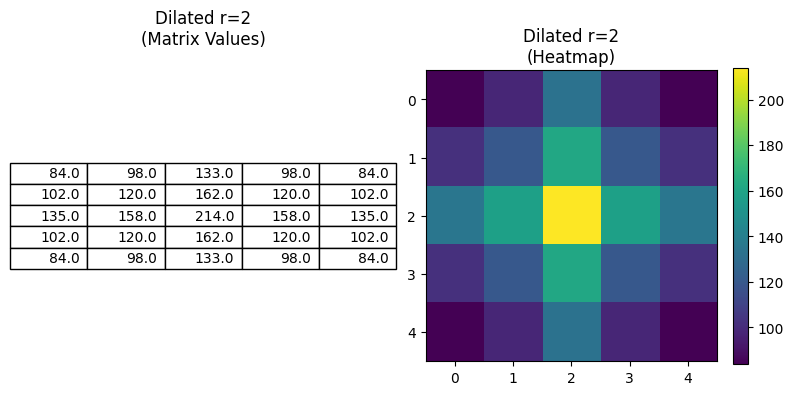

In [64]:
show_matrix_and_heatmap(vals[2][0, :, :, 0], "Dilated r=2")

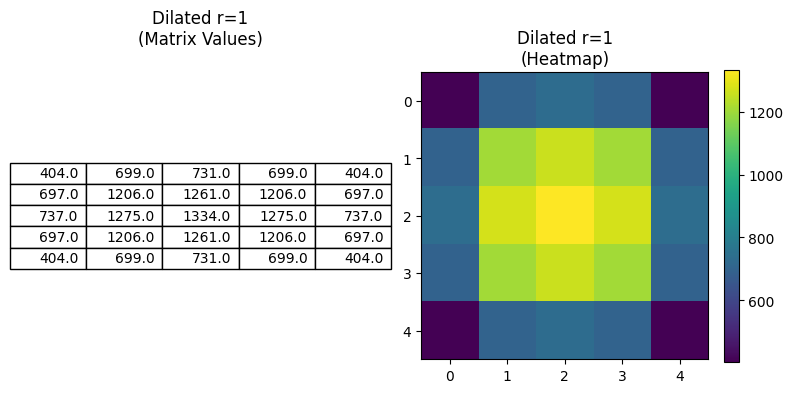

In [65]:
show_matrix_and_heatmap(vals[3][0, :, :, 0], "Dilated r=1")

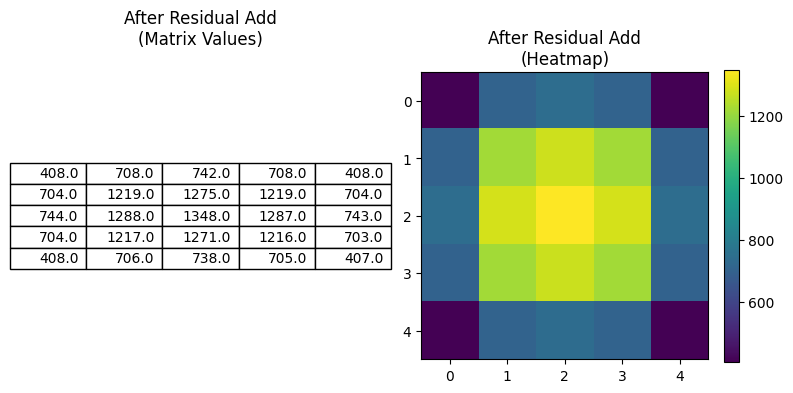

In [66]:
show_matrix_and_heatmap(vals[4][0, :, :, 0], "After Residual Add")

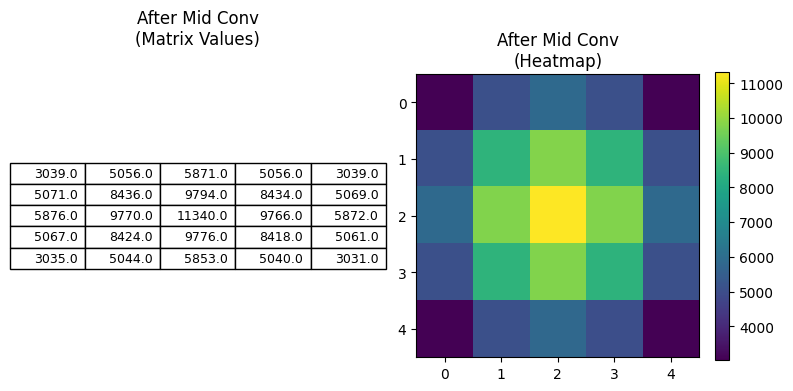

In [67]:
show_matrix_and_heatmap(vals[5][0, :, :, 0], "After Mid Conv")

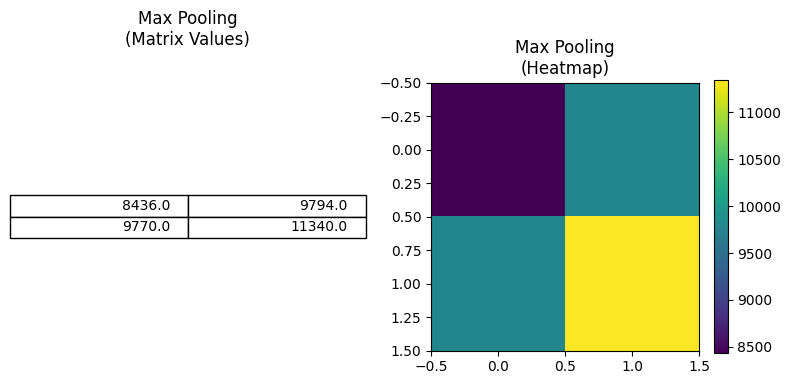

In [68]:
show_matrix_and_heatmap(vals[6][0, :, :, 0], "Max Pooling")

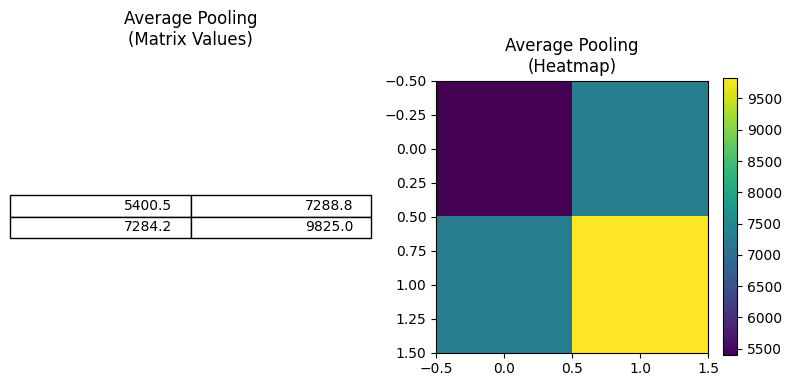

In [69]:
show_matrix_and_heatmap(vals[7][0, :, :, 0], "Average Pooling")

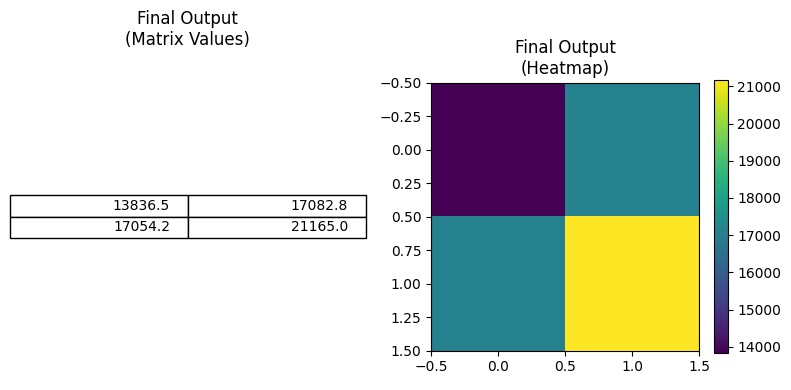

In [70]:
show_matrix_and_heatmap(vals[8][0, :, :, 0], "Final Output")